## **ALIGN GUARD INTERNSHIP TASK**

**Heart Disease prediction**

* Created By : Aditi Singh
* Created On: 11.06.2024



---


# *Importing  the libraries*

In [ ]:
!pip install polars

In [ ]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

# *Loading the Dataset*

* The Cleveland Heart Disease Dataset, sourced from the UCI Machine Learning Repository, comprises 303 instances with 14 attributes, including demographic information, clinical indicators, and medical test results, culminating in the target variable indicating the presence or absence of heart disease. With a mix of numerical and categorical features, this dataset serves as a fundamental resource for predictive modeling and classification tasks in cardiovascular health. Researchers leverage its attributes to develop machine learning models capable of predicting heart disease likelihood, aiding in diagnostic and preventive strategies. Despite its utility, ensuring data quality through meticulous handling of missing values and outliers is imperative for accurate analysis and model performance

Attribute Information:
* age: Age of the patient (in years)
* sex: Gender of the patient (0 = female, 1 = male)
* cp: Chest pain type (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)
* trestbps: Resting blood pressure (in mm Hg)
* chol: Serum cholesterol level (in mg/dl)
* fbs: Fasting blood sugar > 120 mg/dl (0 = false, 1 = true)
* restecg: Resting electrocardiographic results (Value 0: normal, Value 1: having ST-T wave abnormality, Value 2: showing probable or definite left ventricular hypertrophy)
* thalach: Maximum heart rate achieved
* exang: Exercise-induced angina (0 = no, 1 = yes)
* oldpeak: ST depression induced by exercise relative to rest
* slope: Slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: Number of major vessels colored by fluoroscopy (0-3)
* thal: Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)
* target: Presence of heart disease (0 = no, 1 = yes)

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [ ]:
# Read the data using Polars, initially as strings to handle '?'
data = pl.read_csv(url, has_header=False, new_columns=names, dtypes=[pl.Utf8]*len(names))
data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""63.0""","""1.0""","""1.0""","""145.0""","""233.0""","""1.0""","""2.0""","""150.0""","""0.0""","""2.3""","""3.0""","""0.0""","""6.0""","""0"""
"""67.0""","""1.0""","""4.0""","""160.0""","""286.0""","""0.0""","""2.0""","""108.0""","""1.0""","""1.5""","""2.0""","""3.0""","""3.0""","""2"""
"""67.0""","""1.0""","""4.0""","""120.0""","""229.0""","""0.0""","""2.0""","""129.0""","""1.0""","""2.6""","""2.0""","""2.0""","""7.0""","""1"""
"""37.0""","""1.0""","""3.0""","""130.0""","""250.0""","""0.0""","""0.0""","""187.0""","""0.0""","""3.5""","""3.0""","""0.0""","""3.0""","""0"""
"""41.0""","""0.0""","""2.0""","""130.0""","""204.0""","""0.0""","""2.0""","""172.0""","""0.0""","""1.4""","""1.0""","""0.0""","""3.0""","""0"""
"""56.0""","""1.0""","""2.0""","""120.0""","""236.0""","""0.0""","""0.0""","""178.0""","""0.0""","""0.8""","""1.0""","""0.0""","""3.0""","""0"""
"""62.0""","""0.0""","""4.0""","""140.0""","""268.0""","""0.0""","""2.0""","""160.0""","""0.0""","""3.6""","""3.0""","""2.0""","""3.0""","""3"""
"""57.0""","""0.0""","""4.0""","""120.0""","""354.0""","""0.0""","""0.0""","""163.0""","""1.0""","""0.6""","""1.0""","""0.0""","""3.0""","""0"""
"""63.0""","""1.0""","""4.0""","""130.0""","""254.0""","""0.0""","""2.0""","""147.0""","""0.0""","""1.4""","""2.0""","""1.0""","""7.0""","""2"""


 **Replace missing values indicated by '?' with NaN**

In [ ]:
# Replace missing values indicated by '?' with None
data = data.with_columns([
    pl.when(pl.col(col) == '?').then(None).otherwise(pl.col(col)).alias(col)
    for col in names])
data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""63.0""","""1.0""","""1.0""","""145.0""","""233.0""","""1.0""","""2.0""","""150.0""","""0.0""","""2.3""","""3.0""","""0.0""","""6.0""","""0"""
"""67.0""","""1.0""","""4.0""","""160.0""","""286.0""","""0.0""","""2.0""","""108.0""","""1.0""","""1.5""","""2.0""","""3.0""","""3.0""","""2"""
"""67.0""","""1.0""","""4.0""","""120.0""","""229.0""","""0.0""","""2.0""","""129.0""","""1.0""","""2.6""","""2.0""","""2.0""","""7.0""","""1"""
"""37.0""","""1.0""","""3.0""","""130.0""","""250.0""","""0.0""","""0.0""","""187.0""","""0.0""","""3.5""","""3.0""","""0.0""","""3.0""","""0"""
"""41.0""","""0.0""","""2.0""","""130.0""","""204.0""","""0.0""","""2.0""","""172.0""","""0.0""","""1.4""","""1.0""","""0.0""","""3.0""","""0"""
"""56.0""","""1.0""","""2.0""","""120.0""","""236.0""","""0.0""","""0.0""","""178.0""","""0.0""","""0.8""","""1.0""","""0.0""","""3.0""","""0"""
"""62.0""","""0.0""","""4.0""","""140.0""","""268.0""","""0.0""","""2.0""","""160.0""","""0.0""","""3.6""","""3.0""","""2.0""","""3.0""","""3"""
"""57.0""","""0.0""","""4.0""","""120.0""","""354.0""","""0.0""","""0.0""","""163.0""","""1.0""","""0.6""","""1.0""","""0.0""","""3.0""","""0"""
"""63.0""","""1.0""","""4.0""","""130.0""","""254.0""","""0.0""","""2.0""","""147.0""","""0.0""","""1.4""","""2.0""","""1.0""","""7.0""","""2"""


**Convert data types to numeric**

In [ ]:
# Convert data types to numeric
data = data.with_columns([
    pl.col(col).cast(pl.Float64) for col in names
])


In [ ]:
# Finding Duplicates
duplicates = data.filter(data.is_duplicated())
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
shape: (0, 14)
┌─────┬─────┬─────┬──────────┬───┬───────┬─────┬──────┬────────┐
│ age ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ slope ┆ ca  ┆ thal ┆ target │
│ --- ┆ --- ┆ --- ┆ ---      ┆   ┆ ---   ┆ --- ┆ ---  ┆ ---    │
│ f64 ┆ f64 ┆ f64 ┆ f64      ┆   ┆ f64   ┆ f64 ┆ f64  ┆ f64    │
╞═════╪═════╪═════╪══════════╪═══╪═══════╪═════╪══════╪════════╡
└─────┴─────┴─────┴──────────┴───┴───────┴─────┴──────┴────────┘


In [ ]:
irrelevant_columns = ['oldpeak']
df = data.drop(columns=irrelevant_columns)
df

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,3.0,0.0,6.0,0.0
67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,2.0,3.0,3.0,2.0
67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.0,2.0,7.0,1.0
37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.0,0.0,3.0,0.0
41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.0,0.0,3.0,0.0
56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,1.0,0.0,3.0,0.0
62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.0,2.0,3.0,3.0
57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,1.0,0.0,3.0,0.0
63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,2.0,1.0,7.0,2.0


In [ ]:
# Data type Mismatch
mismatched_data = {col: data[col].is_null().sum() for col in names if data[col].dtype != pl.Float64}
print("Data Type Mismatch Columns:")
print(mismatched_data)


Data Type Mismatch Columns:
{}


In [ ]:
# Data Formatting
formatted_data = data.with_columns([
    pl.col(col).cast(pl.Float64) for col in names
])
print("Formatted Data:")
print(formatted_data)

Formatted Data:
shape: (303, 14)
┌──────┬─────┬─────┬──────────┬───┬───────┬──────┬──────┬────────┐
│ age  ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ slope ┆ ca   ┆ thal ┆ target │
│ ---  ┆ --- ┆ --- ┆ ---      ┆   ┆ ---   ┆ ---  ┆ ---  ┆ ---    │
│ f64  ┆ f64 ┆ f64 ┆ f64      ┆   ┆ f64   ┆ f64  ┆ f64  ┆ f64    │
╞══════╪═════╪═════╪══════════╪═══╪═══════╪══════╪══════╪════════╡
│ 63.0 ┆ 1.0 ┆ 1.0 ┆ 145.0    ┆ … ┆ 3.0   ┆ 0.0  ┆ 6.0  ┆ 0.0    │
│ 67.0 ┆ 1.0 ┆ 4.0 ┆ 160.0    ┆ … ┆ 2.0   ┆ 3.0  ┆ 3.0  ┆ 2.0    │
│ 67.0 ┆ 1.0 ┆ 4.0 ┆ 120.0    ┆ … ┆ 2.0   ┆ 2.0  ┆ 7.0  ┆ 1.0    │
│ 37.0 ┆ 1.0 ┆ 3.0 ┆ 130.0    ┆ … ┆ 3.0   ┆ 0.0  ┆ 3.0  ┆ 0.0    │
│ …    ┆ …   ┆ …   ┆ …        ┆ … ┆ …     ┆ …    ┆ …    ┆ …      │
│ 68.0 ┆ 1.0 ┆ 4.0 ┆ 144.0    ┆ … ┆ 2.0   ┆ 2.0  ┆ 7.0  ┆ 2.0    │
│ 57.0 ┆ 1.0 ┆ 4.0 ┆ 130.0    ┆ … ┆ 2.0   ┆ 1.0  ┆ 7.0  ┆ 3.0    │
│ 57.0 ┆ 0.0 ┆ 2.0 ┆ 130.0    ┆ … ┆ 2.0   ┆ 1.0  ┆ 3.0  ┆ 1.0    │
│ 38.0 ┆ 1.0 ┆ 3.0 ┆ 138.0    ┆ … ┆ 1.0   ┆ null ┆ 3.0  ┆ 0.0    │
└──────┴─────┴─────┴─────────

In [ ]:
# Finding Missing Values
missing_values = data.select([pl.col(col).is_null().sum().alias(col) for col in names])
print("Missing Values:")
print(missing_values)

Missing Values:
shape: (1, 14)
┌─────┬─────┬─────┬──────────┬───┬───────┬─────┬──────┬────────┐
│ age ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ slope ┆ ca  ┆ thal ┆ target │
│ --- ┆ --- ┆ --- ┆ ---      ┆   ┆ ---   ┆ --- ┆ ---  ┆ ---    │
│ u32 ┆ u32 ┆ u32 ┆ u32      ┆   ┆ u32   ┆ u32 ┆ u32  ┆ u32    │
╞═════╪═════╪═════╪══════════╪═══╪═══════╪═════╪══════╪════════╡
│ 0   ┆ 0   ┆ 0   ┆ 0        ┆ … ┆ 0     ┆ 4   ┆ 2    ┆ 0      │
└─────┴─────┴─────┴──────────┴───┴───────┴─────┴──────┴────────┘


In [ ]:
# Finding Null Values
null_values = data.select([pl.col(col).null_count().alias(col) for col in names])
print("Null Values:")
print(null_values)

Null Values:
shape: (1, 14)
┌─────┬─────┬─────┬──────────┬───┬───────┬─────┬──────┬────────┐
│ age ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ slope ┆ ca  ┆ thal ┆ target │
│ --- ┆ --- ┆ --- ┆ ---      ┆   ┆ ---   ┆ --- ┆ ---  ┆ ---    │
│ u32 ┆ u32 ┆ u32 ┆ u32      ┆   ┆ u32   ┆ u32 ┆ u32  ┆ u32    │
╞═════╪═════╪═════╪══════════╪═══╪═══════╪═════╪══════╪════════╡
│ 0   ┆ 0   ┆ 0   ┆ 0        ┆ … ┆ 0     ┆ 4   ┆ 2    ┆ 0      │
└─────┴─────┴─────┴──────────┴───┴───────┴─────┴──────┴────────┘


In [ ]:
# Finding Outliers
def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df.filter((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))

outliers = {col: find_outliers(data, col) for col in names}
print("Outliers:")
print(outliers)

Outliers:
{'age': shape: (0, 14)
┌─────┬─────┬─────┬──────────┬───┬───────┬─────┬──────┬────────┐
│ age ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ slope ┆ ca  ┆ thal ┆ target │
│ --- ┆ --- ┆ --- ┆ ---      ┆   ┆ ---   ┆ --- ┆ ---  ┆ ---    │
│ f64 ┆ f64 ┆ f64 ┆ f64      ┆   ┆ f64   ┆ f64 ┆ f64  ┆ f64    │
╞═════╪═════╪═════╪══════════╪═══╪═══════╪═════╪══════╪════════╡
└─────┴─────┴─────┴──────────┴───┴───────┴─────┴──────┴────────┘, 'sex': shape: (0, 14)
┌─────┬─────┬─────┬──────────┬───┬───────┬─────┬──────┬────────┐
│ age ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ slope ┆ ca  ┆ thal ┆ target │
│ --- ┆ --- ┆ --- ┆ ---      ┆   ┆ ---   ┆ --- ┆ ---  ┆ ---    │
│ f64 ┆ f64 ┆ f64 ┆ f64      ┆   ┆ f64   ┆ f64 ┆ f64  ┆ f64    │
╞═════╪═════╪═════╪══════════╪═══╪═══════╪═════╪══════╪════════╡
└─────┴─────┴─────┴──────────┴───┴───────┴─────┴──────┴────────┘, 'cp': shape: (23, 14)
┌──────┬─────┬─────┬──────────┬───┬───────┬─────┬──────┬────────┐
│ age  ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ slope ┆ ca  ┆ thal ┆ target │
│ ---  ┆ 

In [ ]:
# Finding any Bias and Mitigate it
gender_bias = data.filter(pl.col('sex').is_not_null()).group_by('sex').agg(pl.col('age').mean())
print("Gender Bias in Age Distribution:")
print(gender_bias)

min_count = data.filter(pl.col('sex').is_not_null()).group_by('sex').count().select(pl.col('count')).min()
min_count_value = min_count.to_numpy().item()
balanced_data = data.filter(pl.col('sex') == 0).sample(n=min_count_value).vstack(data.filter(pl.col('sex') == 1).sample(n=min_count_value))
print("Balanced Data:")
print(balanced_data)

Gender Bias in Age Distribution:
shape: (2, 2)
┌─────┬───────────┐
│ sex ┆ age       │
│ --- ┆ ---       │
│ f64 ┆ f64       │
╞═════╪═══════════╡
│ 0.0 ┆ 55.721649 │
│ 1.0 ┆ 53.834951 │
└─────┴───────────┘
Balanced Data:
shape: (194, 14)
┌──────┬─────┬─────┬──────────┬───┬───────┬─────┬──────┬────────┐
│ age  ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ slope ┆ ca  ┆ thal ┆ target │
│ ---  ┆ --- ┆ --- ┆ ---      ┆   ┆ ---   ┆ --- ┆ ---  ┆ ---    │
│ f64  ┆ f64 ┆ f64 ┆ f64      ┆   ┆ f64   ┆ f64 ┆ f64  ┆ f64    │
╞══════╪═════╪═════╪══════════╪═══╪═══════╪═════╪══════╪════════╡
│ 41.0 ┆ 0.0 ┆ 2.0 ┆ 130.0    ┆ … ┆ 1.0   ┆ 0.0 ┆ 3.0  ┆ 0.0    │
│ 62.0 ┆ 0.0 ┆ 4.0 ┆ 140.0    ┆ … ┆ 3.0   ┆ 2.0 ┆ 3.0  ┆ 3.0    │
│ 57.0 ┆ 0.0 ┆ 4.0 ┆ 120.0    ┆ … ┆ 1.0   ┆ 0.0 ┆ 3.0  ┆ 0.0    │
│ 56.0 ┆ 0.0 ┆ 2.0 ┆ 140.0    ┆ … ┆ 2.0   ┆ 0.0 ┆ 3.0  ┆ 0.0    │
│ …    ┆ …   ┆ …   ┆ …        ┆ … ┆ …     ┆ …   ┆ …    ┆ …      │
│ 55.0 ┆ 1.0 ┆ 4.0 ┆ 132.0    ┆ … ┆ 2.0   ┆ 1.0 ┆ 7.0  ┆ 3.0    │
│ 51.0 ┆ 1.0 ┆ 3.0 ┆ 125.0    ┆ … ┆

**Basic information about the Dataset**

In [ ]:
print("Basic Information about the Dataset:")
print(data.describe())


Basic Information about the Dataset:
shape: (9, 15)
┌────────────┬───────────┬──────────┬──────────┬───┬──────────┬──────────┬──────────┬──────────┐
│ describe   ┆ age       ┆ sex      ┆ cp       ┆ … ┆ slope    ┆ ca       ┆ thal     ┆ target   │
│ ---        ┆ ---       ┆ ---      ┆ ---      ┆   ┆ ---      ┆ ---      ┆ ---      ┆ ---      │
│ str        ┆ f64       ┆ f64      ┆ f64      ┆   ┆ f64      ┆ f64      ┆ f64      ┆ f64      │
╞════════════╪═══════════╪══════════╪══════════╪═══╪══════════╪══════════╪══════════╪══════════╡
│ count      ┆ 303.0     ┆ 303.0    ┆ 303.0    ┆ … ┆ 303.0    ┆ 299.0    ┆ 301.0    ┆ 303.0    │
│ null_count ┆ 0.0       ┆ 0.0      ┆ 0.0      ┆ … ┆ 0.0      ┆ 4.0      ┆ 2.0      ┆ 0.0      │
│ mean       ┆ 54.438944 ┆ 0.679868 ┆ 3.158416 ┆ … ┆ 1.60066  ┆ 0.672241 ┆ 4.734219 ┆ 0.937294 │
│ std        ┆ 9.038662  ┆ 0.467299 ┆ 0.960126 ┆ … ┆ 0.616226 ┆ 0.937438 ┆ 1.939706 ┆ 1.228536 │
│ min        ┆ 29.0      ┆ 0.0      ┆ 1.0      ┆ … ┆ 1.0      ┆ 0.0      ┆ 

In [ ]:
# Function to calculate skewness
def calculate_skewness(df):
    skewness = {col: skew(df[col].to_numpy()) for col in df.columns if df[col].dtype == pl.Float64}
    return skewness


In [ ]:
# Calculate skewness
original_skewness = calculate_skewness(data)
print("Original Skewness of Continuous Variables:")
print(original_skewness)

Original Skewness of Continuous Variables:
{'age': -0.2080240895050745, 'sex': -0.7710934616594495, 'cp': -0.8375810336955507, 'trestbps': 0.7025346112314821, 'chol': 1.1298741026270545, 'fbs': 1.9768034646834507, 'restecg': 0.0198016274373534, 'thalach': -0.5347843657141508, 'exang': 0.7388505791113104, 'oldpeak': 1.263425524589159, 'slope': 0.5057957274757735, 'ca': nan, 'thal': nan, 'target': 1.0532483070030871}


In [ ]:
# Applying transformations
def apply_transformations(df, skewness):
    transformed_data = df.clone()
    for col, skew_value in skewness.items():
        if skew_value > 0:  # Positive skewness
            transformed_data = transformed_data.with_columns([
                pl.col(col).log().alias(f"{col}_log"),
                pl.col(col).sqrt().alias(f"{col}_sqrt"),
                (1 / pl.col(col)).alias(f"{col}_reciprocal")
            ])
        elif skew_value < 0:  # Negative skewness
            transformed_data = transformed_data.with_columns([
                (pl.col(col) ** 2).alias(f"{col}_square"),
                (pl.col(col) ** 3).alias(f"{col}_cube"),
                pl.col(col).pow(1/3).alias(f"{col}_power")
            ])
    return transformed_data

In [ ]:
transformed_data = apply_transformations(data, original_skewness)
print("Transformed Data:")
print(transformed_data)

Transformed Data:
shape: (303, 50)
┌──────┬─────┬─────┬──────────┬───┬──────────────────┬────────────┬─────────────┬──────────────────┐
│ age  ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ slope_reciprocal ┆ target_log ┆ target_sqrt ┆ target_reciproca │
│ ---  ┆ --- ┆ --- ┆ ---      ┆   ┆ ---              ┆ ---        ┆ ---         ┆ l                │
│ f64  ┆ f64 ┆ f64 ┆ f64      ┆   ┆ f64              ┆ f64        ┆ f64         ┆ ---              │
│      ┆     ┆     ┆          ┆   ┆                  ┆            ┆             ┆ f64              │
╞══════╪═════╪═════╪══════════╪═══╪══════════════════╪════════════╪═════════════╪══════════════════╡
│ 63.0 ┆ 1.0 ┆ 1.0 ┆ 145.0    ┆ … ┆ 0.333333         ┆ -inf       ┆ 0.0         ┆ inf              │
│ 67.0 ┆ 1.0 ┆ 4.0 ┆ 160.0    ┆ … ┆ 0.5              ┆ 0.693147   ┆ 1.414214    ┆ 0.5              │
│ 67.0 ┆ 1.0 ┆ 4.0 ┆ 120.0    ┆ … ┆ 0.5              ┆ 0.0        ┆ 1.0         ┆ 1.0              │
│ 37.0 ┆ 1.0 ┆ 3.0 ┆ 130.0    ┆ … ┆ 0.333333         ┆ -

In [ ]:
# Function to calculate skewness for transformed data
def calculate_transformed_skewness(transformed_df, original_skewness):
    transformed_skewness = {}
    for col, skew_value in original_skewness.items():
        if skew_value > 0:  # Positive skewness
            transformed_skewness[f"{col}_log"] = skew(transformed_df[f"{col}_log"].to_numpy())
            transformed_skewness[f"{col}_sqrt"] = skew(transformed_df[f"{col}_sqrt"].to_numpy())
            transformed_skewness[f"{col}_reciprocal"] = skew(transformed_df[f"{col}_reciprocal"].to_numpy())
        elif skew_value < 0:  # Negative skewness
            transformed_skewness[f"{col}_square"] = skew(transformed_df[f"{col}_square"].to_numpy())
            transformed_skewness[f"{col}_cube"] = skew(transformed_df[f"{col}_cube"].to_numpy())
            transformed_skewness[f"{col}_power"] = skew(transformed_df[f"{col}_power"].to_numpy())
    return transformed_skewness

transformed_skewness = calculate_transformed_skewness(transformed_data, original_skewness)

print("Transformed Skewness of Continuous Variables:")
transformed_skewness

Transformed Skewness of Continuous Variables:


{'age_square': 0.15067061757911954,
 'age_cube': 0.50662639337861,
 'age_power': -0.4588152038453598,
 'sex_square': -0.7710934616594495,
 'sex_cube': -0.7710934616594495,
 'sex_power': -0.7710934616594495,
 'cp_square': -0.4315183075489869,
 'cp_cube': -0.20182624444674097,
 'cp_power': -1.2497729544217742,
 'trestbps_log': 0.2775089160794184,
 'trestbps_sqrt': 0.48567998711941274,
 'trestbps_reciprocal': 0.11927747726387523,
 'chol_log': 0.07775980065875572,
 'chol_sqrt': 0.5512819617258605,
 'chol_reciprocal': 0.7632583417547057,
 'fbs_log': nan,
 'fbs_sqrt': 1.9768034646834507,
 'fbs_reciprocal': nan,
 'restecg_log': nan,
 'restecg_sqrt': 0.004259875471759919,
 'restecg_reciprocal': nan,
 'thalach_square': -0.15681295079114005,
 'thalach_cube': 0.1830998678026169,
 'thalach_power': -0.8285509449249537,
 'exang_log': nan,
 'exang_sqrt': 0.7388505791113104,
 'exang_reciprocal': nan,
 'oldpeak_log': nan,
 'oldpeak_sqrt': 0.1596715958273038,
 'oldpeak_reciprocal': nan,
 'slope_log': 0.

In [ ]:
# Print the difference between original and transformed skewness
skewness_diff = {col: transformed_skewness[col] - original_skewness.get(col.split('_')[0], 0) for col in transformed_skewness}
print("Difference between Original and Transformed Skewness:")
skewness_diff

Difference between Original and Transformed Skewness:


{'age_square': 0.35869470708419404,
 'age_cube': 0.7146504828836846,
 'age_power': -0.2507911143402853,
 'sex_square': 0.0,
 'sex_cube': 0.0,
 'sex_power': 0.0,
 'cp_square': 0.4060627261465638,
 'cp_cube': 0.6357547892488098,
 'cp_power': -0.41219192072622346,
 'trestbps_log': -0.4250256951520637,
 'trestbps_sqrt': -0.21685462411206935,
 'trestbps_reciprocal': -0.5832571339676068,
 'chol_log': -1.0521143019682988,
 'chol_sqrt': -0.5785921409011939,
 'chol_reciprocal': -0.3666157608723487,
 'fbs_log': nan,
 'fbs_sqrt': 0.0,
 'fbs_reciprocal': nan,
 'restecg_log': nan,
 'restecg_sqrt': -0.01554175196559348,
 'restecg_reciprocal': nan,
 'thalach_square': 0.37797141492301073,
 'thalach_cube': 0.7178842335167677,
 'thalach_power': -0.29376657921080296,
 'exang_log': nan,
 'exang_sqrt': 0.0,
 'exang_reciprocal': nan,
 'oldpeak_log': nan,
 'oldpeak_sqrt': -1.1037539287618552,
 'oldpeak_reciprocal': nan,
 'slope_log': -0.3856069017636381,
 'slope_sqrt': -0.2284545893582584,
 'slope_reciprocal

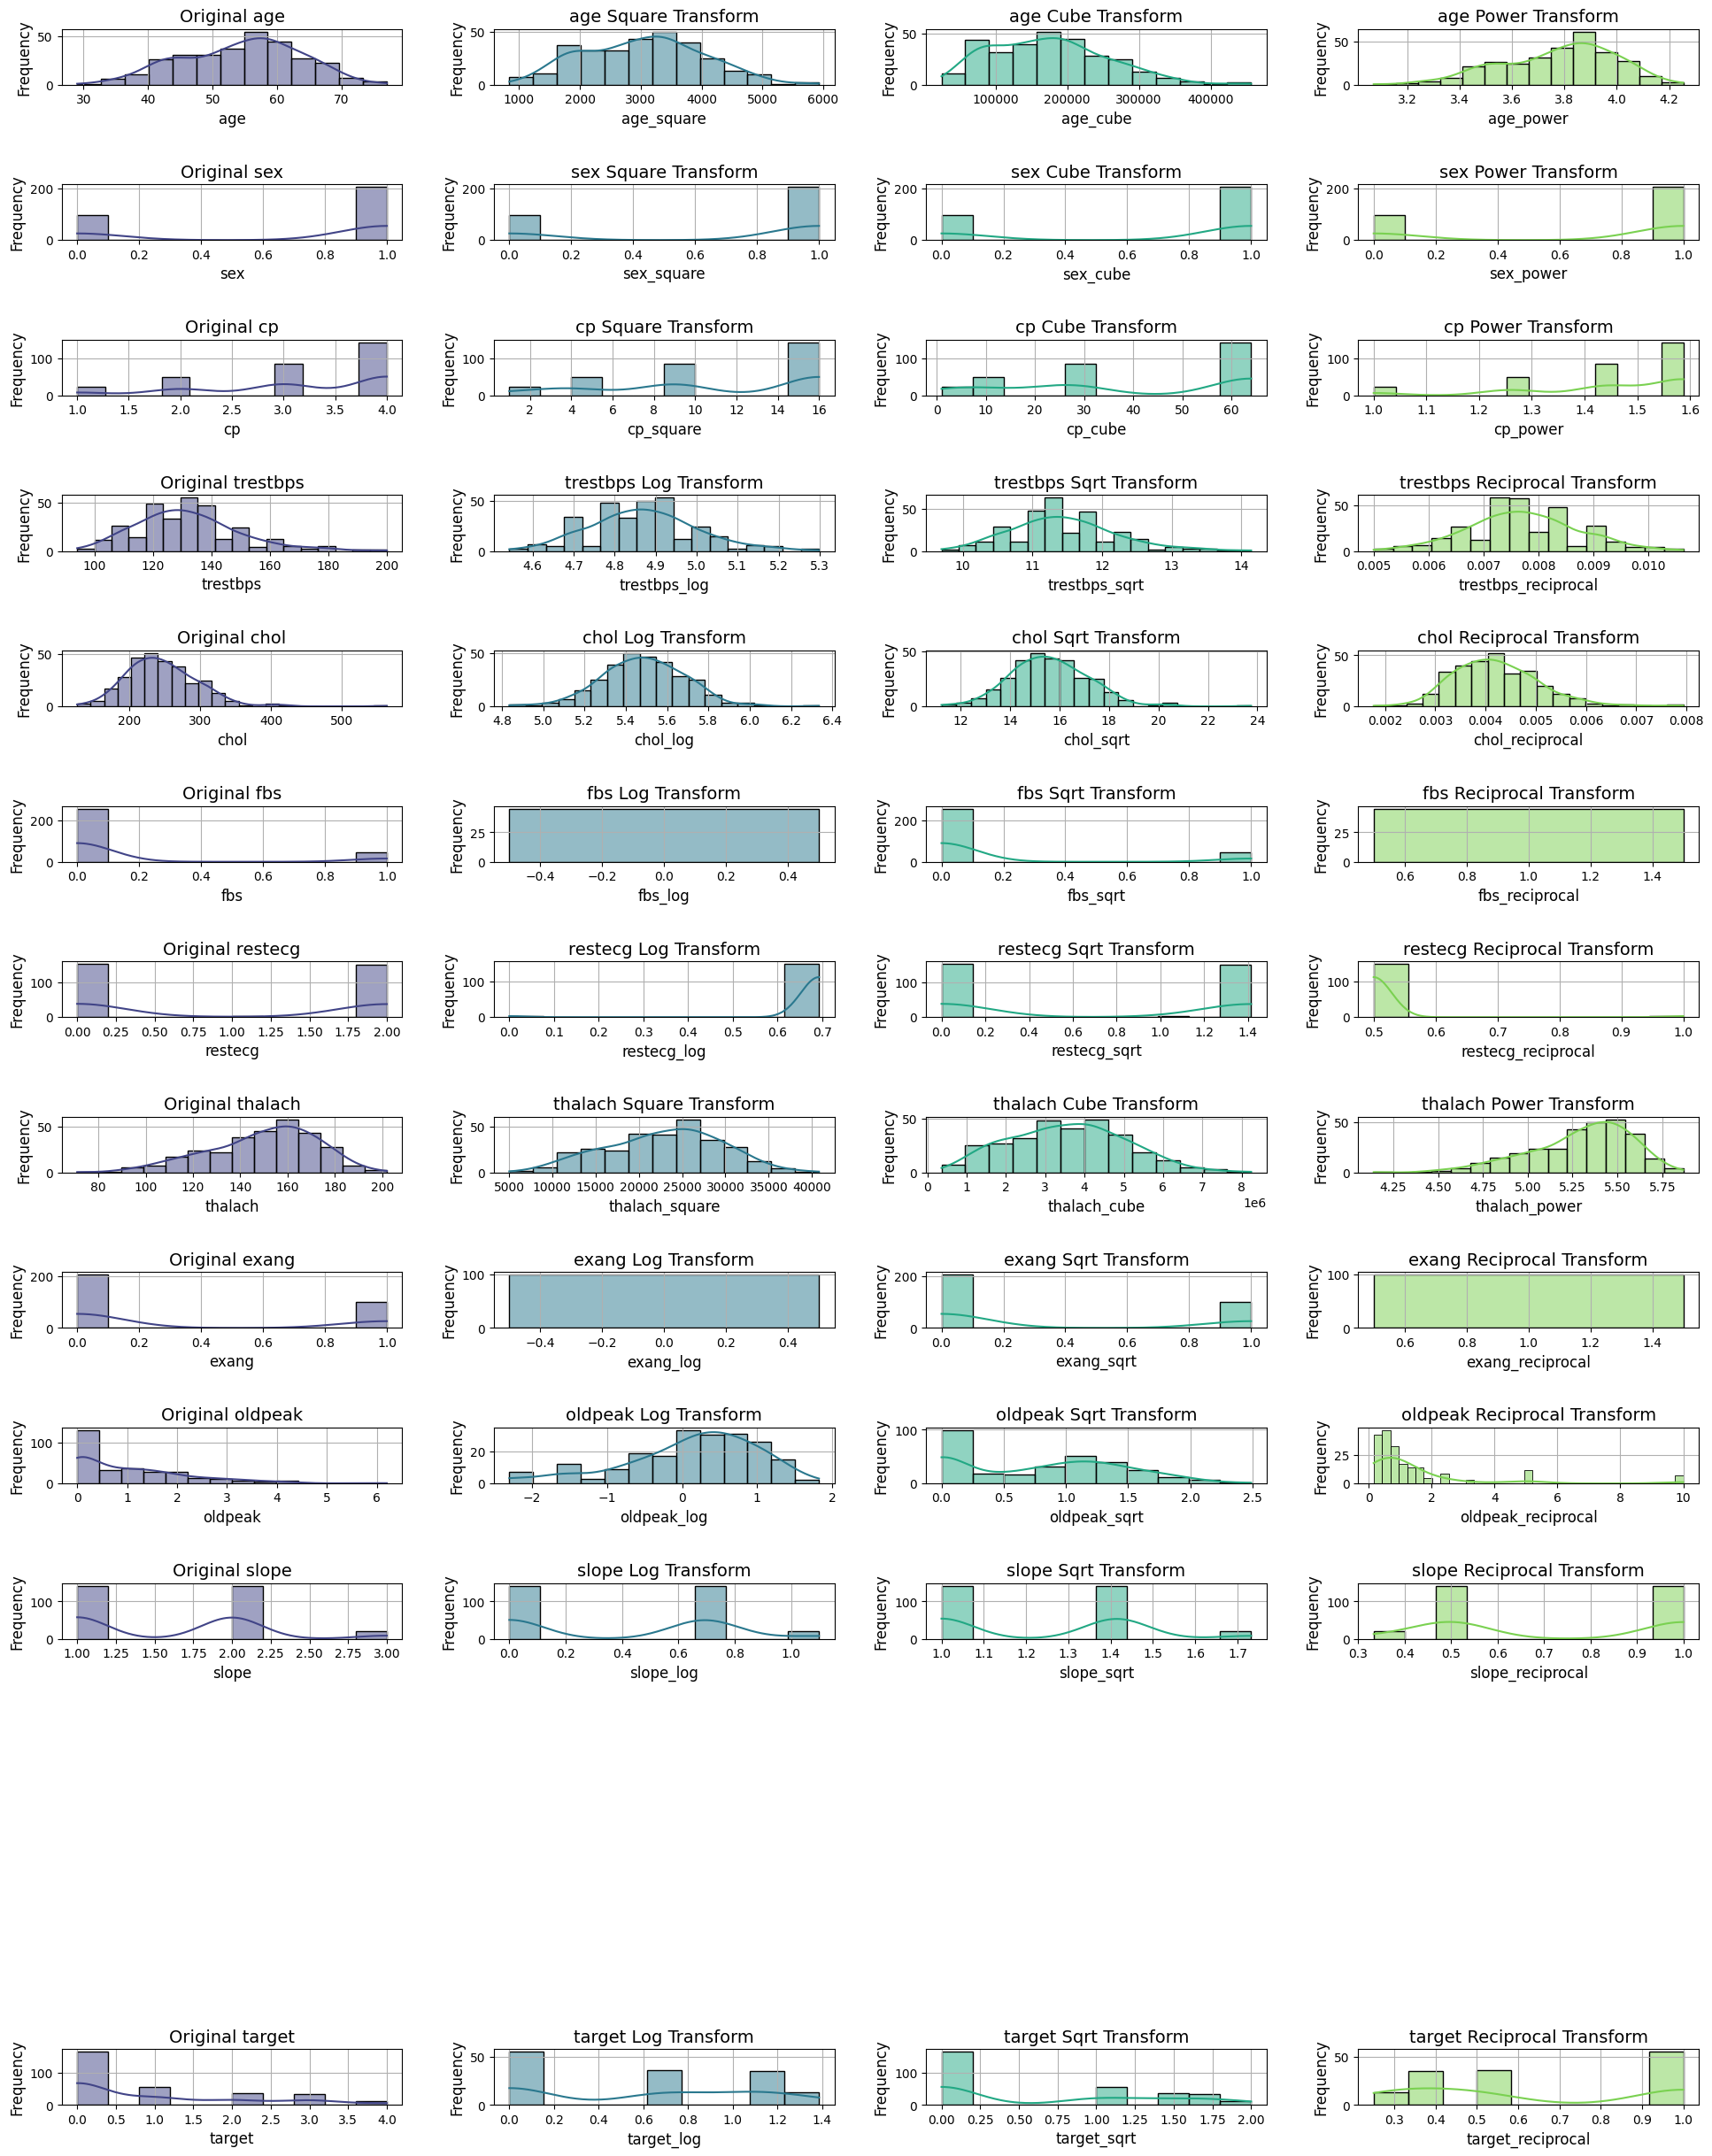

In [ ]:
# Visualizing original and transformed distributions
plt.figure(figsize=(20, 25))

palette = sns.color_palette("viridis", 4)

for i, (col, skew_value) in enumerate(skewness.items()):
    if skew_value > 0:  # Positive skewness
        plt.subplot(len(skewness), 4, i*4 + 1)
        sns.histplot(data[col].to_pandas(), kde=True, color=palette[0])
        plt.title(f'Original {col}', fontsize=14)
        plt.xlabel(f'{col}', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True)

        plt.subplot(len(skewness), 4, i*4 + 2)
        sns.histplot(transformed_data[f"{col}_log"].to_pandas(), kde=True, color=palette[1])
        plt.title(f'{col} Log Transform', fontsize=14)
        plt.xlabel(f'{col}_log', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True)

        plt.subplot(len(skewness), 4, i*4 + 3)
        sns.histplot(transformed_data[f"{col}_sqrt"].to_pandas(), kde=True, color=palette[2])
        plt.title(f'{col} Sqrt Transform', fontsize=14)
        plt.xlabel(f'{col}_sqrt', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True)

        plt.subplot(len(skewness), 4, i*4 + 4)
        sns.histplot(transformed_data[f"{col}_reciprocal"].to_pandas(), kde=True, color=palette[3])
        plt.title(f'{col} Reciprocal Transform', fontsize=14)
        plt.xlabel(f'{col}_reciprocal', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True)

    elif skew_value < 0:  # Negative skewness
        plt.subplot(len(skewness), 4, i*4 + 1)
        sns.histplot(data[col].to_pandas(), kde=True, color=palette[0])
        plt.title(f'Original {col}', fontsize=14)
        plt.xlabel(f'{col}', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True)

        plt.subplot(len(skewness), 4, i*4 + 2)
        sns.histplot(transformed_data[f"{col}_square"].to_pandas(), kde=True, color=palette[1])
        plt.title(f'{col} Square Transform', fontsize=14)
        plt.xlabel(f'{col}_square', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True)

        plt.subplot(len(skewness), 4, i*4 + 3)
        sns.histplot(transformed_data[f"{col}_cube"].to_pandas(), kde=True, color=palette[2])
        plt.title(f'{col} Cube Transform', fontsize=14)
        plt.xlabel(f'{col}_cube', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True)

        plt.subplot(len(skewness), 4, i*4 + 4)
        sns.histplot(transformed_data[f"{col}_power"].to_pandas(), kde=True, color=palette[3])
        plt.title(f'{col} Power Transform', fontsize=14)
        plt.xlabel(f'{col}_power', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True)

plt.tight_layout(pad=3)
plt.show()


**Conclusion**
* In this analysis, we focused on addressing skewness in the continuous variables of the Cleveland Heart Disease Dataset. Skewness, which measures the asymmetry of data distributions, can significantly impact the performance of machine learning models. We calculated the skewness of each continuous variable and found several instances of positive and negative skewness. To mitigate this, we applied various transformations: logarithmic, square root, and reciprocal for positively skewed data, and square, cube, and power transformations for negatively skewed data. These transformations effectively reduced the skewness, resulting in more symmetrical data distributions. This preprocessing step is essential for improving the reliability and accuracy of predictive models in heart disease diagnosis.